In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from imblearn.under_sampling import NearMiss


In [18]:
df=pd.read_csv('strokes.csv')

In [19]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Importação de bibliotecas, dos dados da database e exibição dos 5 prieiros dados da database

In [20]:
df.shape

(5110, 12)

Número de linhas e colunas da database

In [21]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Contagem de nulos na database, apenas a coluna "bmi" têm 201 linhas com esse valor.

In [22]:
df=df.dropna()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Retirada das linhas com arquivos nulos, agora o total de linhas passa a ser 4909, pois excluimos 201.

In [23]:
df=df.drop(df.columns[0],axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Retirada  da coluna "id" pois não faz sentido analisar esses valores.

In [24]:
df.ever_married.value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

Contagem dos valores sobre a pessoa já ter sido casada.

In [25]:
df.loc[df['ever_married'] == "Yes", 'ever_married'] = 1
df.loc[df['ever_married'] == "No", 'ever_married'] = 0
df['ever_married']=df['ever_married'].astype(str).astype(int)
df.ever_married.value_counts()

1    3204
0    1705
Name: ever_married, dtype: int64

Transformamos os valores "Yes" em "1" e os valores "No" em 0, no que tange a coluna "ever_married". Também passando os dados da coluna que antes eram object para int.

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
ever_married,4909.0,0.652679,0.476167,0.00,0.00,1.00,1.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


Aqui podemos ver que a média da idade das pessoas analisadas é de quase 43 anos, apenas 9% das pessoas analisadas tem hipertensão, 4% tem problemas de coração, 65% já foram casados, o índice médio de glicose era de 105 e o índice de massa corporal era de quase 29.


In [27]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

Fazemos uma contagem do gênero das pessoas estudadas, há mais mulheres que homens no estudo, mas o maior problema é ter uma pessoa com um gênero "Other". Para melhorar o modelo, iremos excluir esta pessoa.

In [28]:
df = df.drop(df[df.gender == "Other"].index)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,0,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


Exclusão da linha onde existe o gênero "Other"

In [12]:
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

Contagem de pessoas estudadas que tiveram AVC.

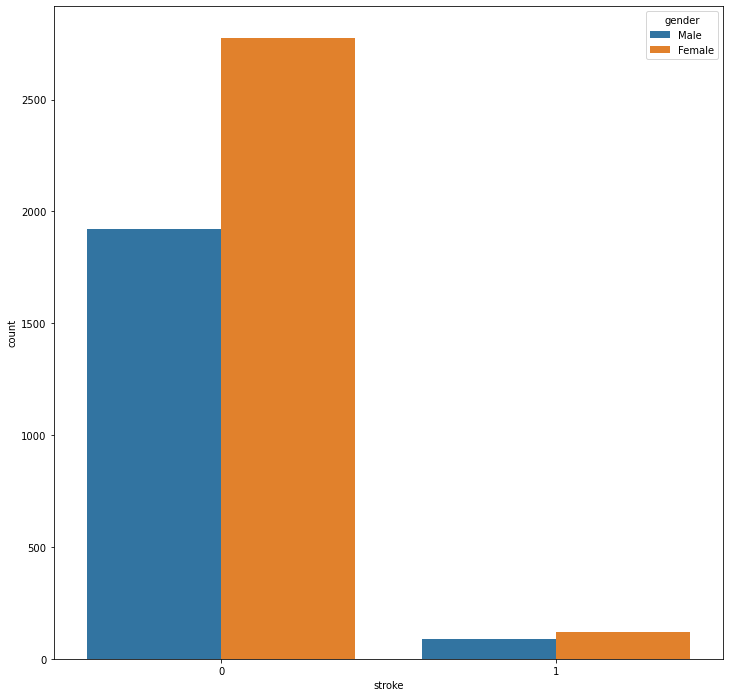

In [35]:
plt.figure(figsize=(12,12))
sns.countplot(x=df.stroke,hue=df.gender)
plt.show()

Countplot das pessoas que tiveram e que não tiveram AVC, usando gênero como cores diferentes. Em ambas as colunas existem mais mulheres.

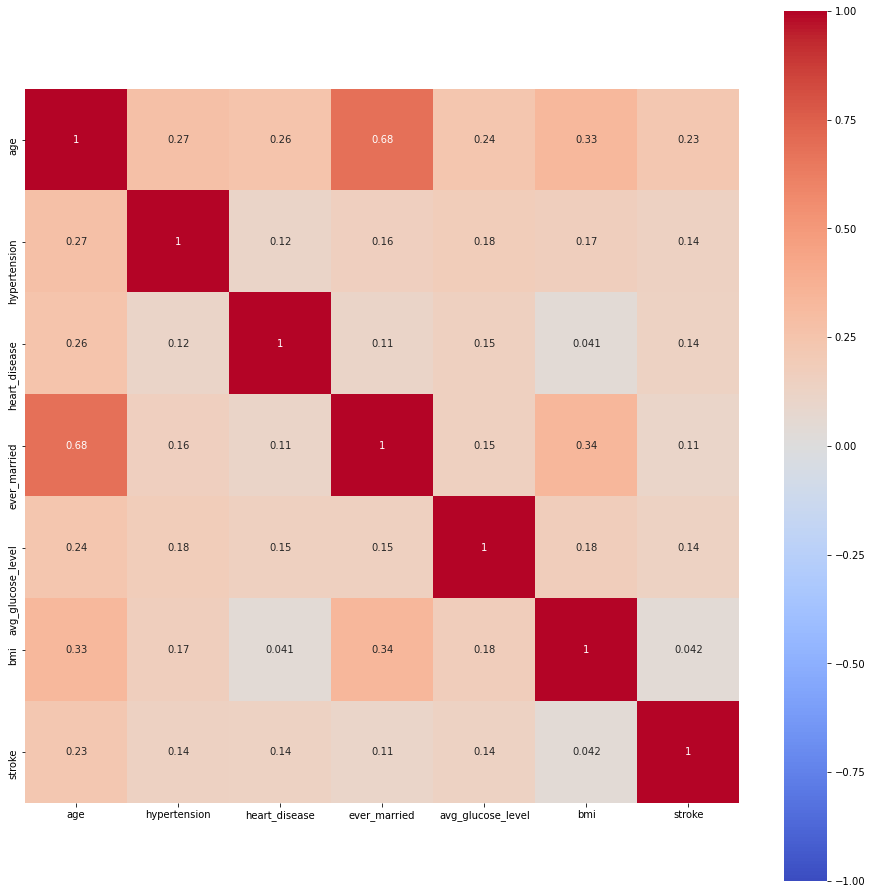

In [36]:
corr = df.corr()
plt.figure(figsize = (16,16))
sns.heatmap(corr,vmax = 1,square = True,annot = True,cmap= 'coolwarm',vmin = -1)
plt.show()

Gráfico de calor. Há uma correlação fraca e positiva entre a pessoa ter AVC e todas as outras informações. Há também uma correlação fraca e também positiva entre o índice de massa corporal e a pessoa ser ou ter sido casada.

<AxesSubplot:xlabel='work_type', ylabel='avg_glucose_level'>

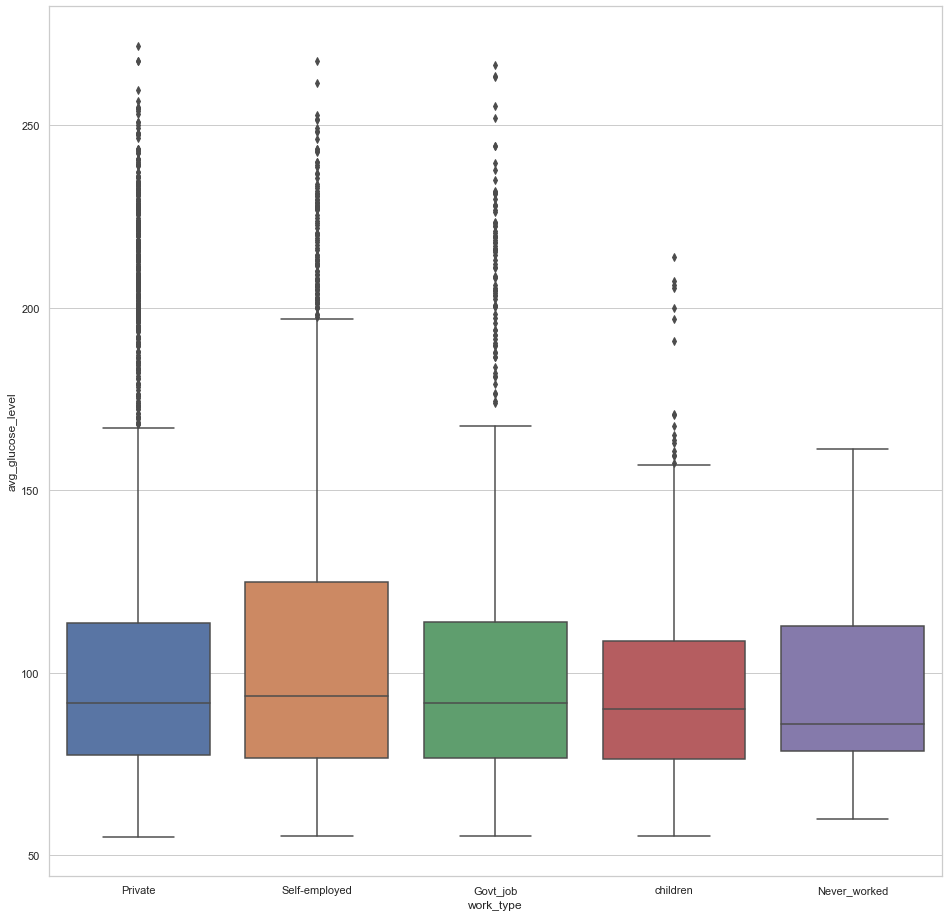

In [57]:
plt.figure(figsize = (16,16))
sns.set_theme(style="whitegrid")
sns.boxplot(x='work_type',y='avg_glucose_level',data=df)

Boxplot em que utilizamos X como tipo de emprego e Y como glicose.

In [51]:
st=df.loc[df['stroke']==1]
st

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
243,Female,68.0,1,1,1,Private,Urban,247.51,40.5,formerly smoked,1
244,Male,57.0,0,0,1,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,0,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,1,Self-employed,Rural,78.80,29.3,formerly smoked,1


Criação de um novo dataframe, onde nele temos apenas as pessoas que tiveram AVC

In [31]:
st.describe().T

,count,mean,std,min,25%,50%,75%,max
age,209.0,67.712919,12.402848,14.00,58.00,70.00,78.00,82.00
hypertension,209.0,0.287081,0.453486,0.00,0.00,0.00,1.00,1.00
heart_disease,209.0,0.191388,0.394338,0.00,0.00,0.00,0.00,1.00
ever_married,209.0,0.889952,0.313701,0.00,1.00,1.00,1.00,1.00
avg_glucose_level,209.0,134.571388,62.462047,56.11,80.43,106.58,196.92,271.74
bmi,209.0,30.471292,6.329452,16.90,26.40,29.70,33.70,56.60
stroke,209.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00


Utilizando o dataframe onde estão apenas as pessoas que tiveram AVC, podemos analisar que a média de idade era de quase 68 anos. Cerca de 29% deles têm hipertensão, 19% têm problemas cardíacos, 89% já foram ou são casados, o nível médio de glicose é de 134 e o índice de massa corporal é de 30.

Todos esses números são maiores que os do dataframe onde estão misturadas as pessoas que tiveram e não tiveram AVC.

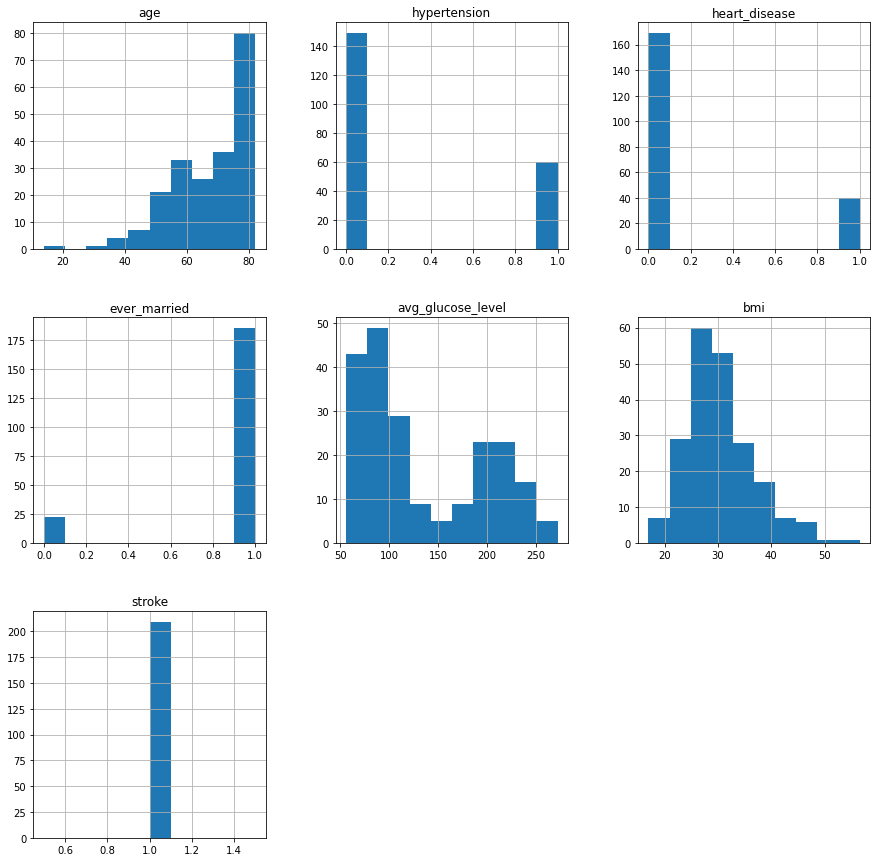

In [33]:
st.hist(figsize=(15,15))
plt.show()

Histograma com os dados das pessoas que tiveram AVC.

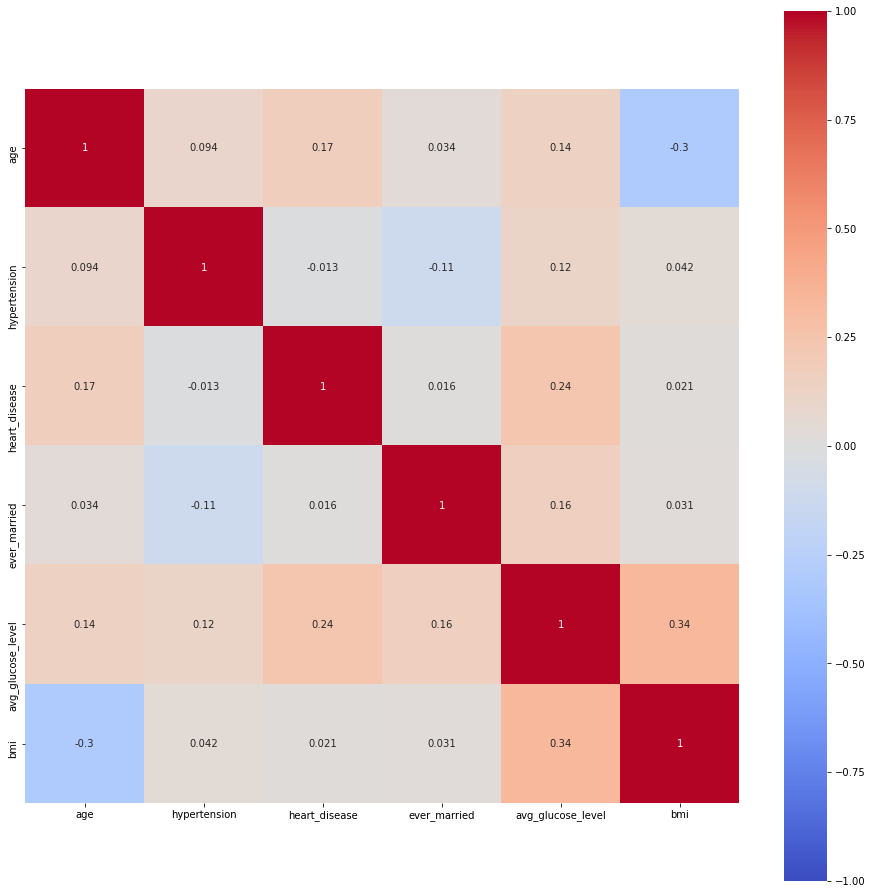

In [37]:
st2=st.drop(df.columns[10],axis=1)
corr = st2.corr()
plt.figure(figsize = (16,16))
sns.heatmap(corr,vmax = 1,square = True,annot = True,cmap= 'coolwarm',vmin = -1)
plt.show()

Vendo o mapa de calor das pessoas que tiveram AVC, não há muita coisa para se ver além de haver uma correlação fraca negativa entre idade e índice de massa corporal e uma correlação positiva fraca entre o índice de massa corporal e o nível de glicose médio.

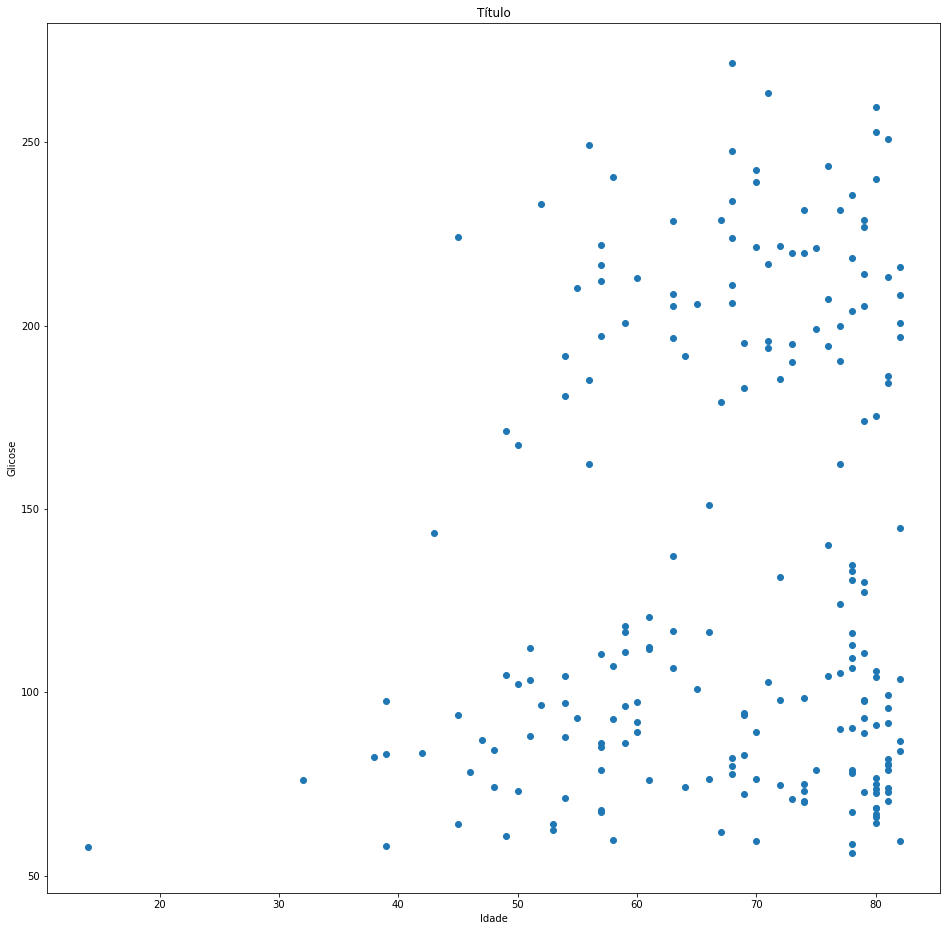

In [38]:
plt.figure(figsize=(16,16))
plt.scatter(st.age,st.avg_glucose_level)
plt.title("Título")
plt.ylabel("Glicose")
plt.xlabel("Idade")

plt.show()

Um gráfico de dispersão Idade X Índice de Glicose, nele vemos que os índices mais elevados de glicose se concentram em pessoas com mais de 50 anos. Também vemos que há uma pessoa que sofreu AVC com menos de 30 anos. Trataremos como outlier

In [52]:
st=st.loc[st['age']>=30]


Retirada da linha em que a idade era menor que 30.

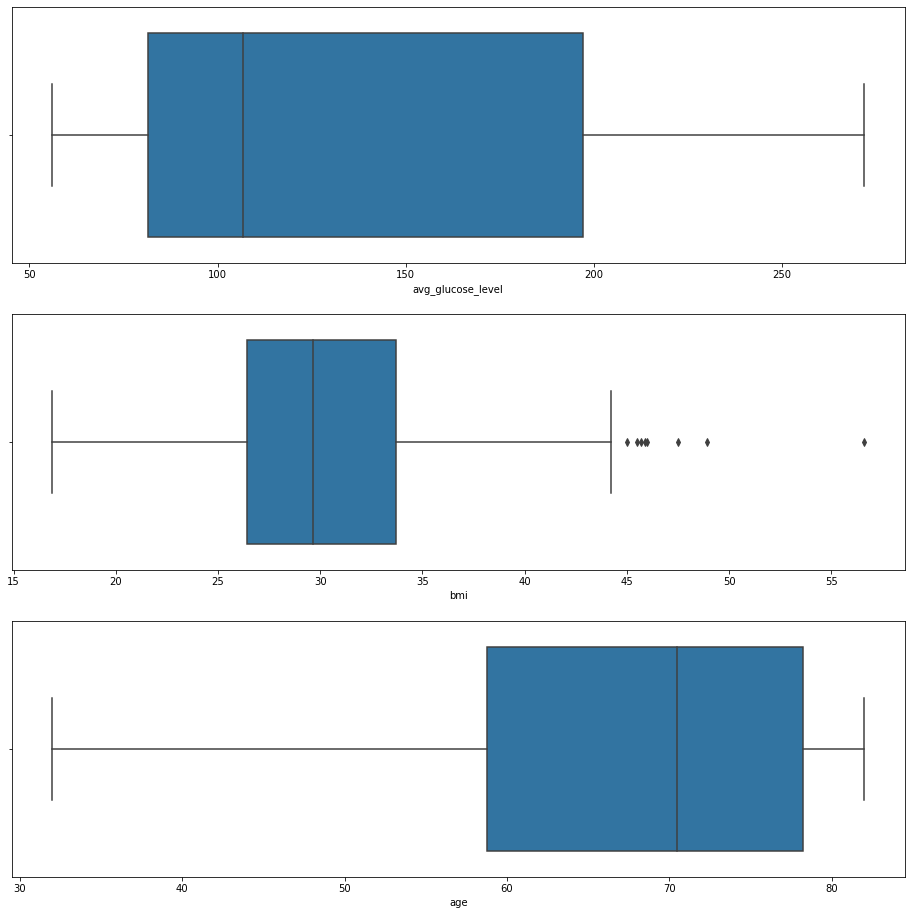

In [44]:
plt.figure(figsize = (16,16))

plt.subplot(3,1,1)
sns.boxplot(x=st['avg_glucose_level'])

plt.subplot(3,1,2)
sns.boxplot(x=st['bmi'])

plt.subplot(3,1,3)
sns.boxplot(x=st['age'])



plt.show()

Plotagem de 3 boxplots. Nele podemos ver que o índice de massa corporal têm alguns outliers que têm o índice maior ou igual a 42.

In [53]:
st=st.loc[st['bmi']<=42]


Retirada dos outliers do índice de massa corporal.

In [26]:
st

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
241,Male,57.0,0,0,1,Private,Rural,197.28,34.5,formerly smoked,1
243,Female,68.0,1,1,1,Private,Urban,247.51,40.5,formerly smoked,1
244,Male,57.0,0,0,1,Private,Rural,84.96,36.7,Unknown,1
246,Female,75.0,0,0,1,Self-employed,Rural,78.80,29.3,formerly smoked,1


Tabela com os dados das pessoas que tiveram AVC já sem os outliers.

In [59]:
x=df.iloc[:,0:10].values
y=df.iloc[:,10].values

Separação dos valores da colunas. Levaremos a coluna que indica a presença ou não do AVC para a variável Y e o resto das informações para X.

In [60]:
labelencoder1=LabelEncoder()
x[:,0]= labelencoder1.fit_transform(x[:,0])
labelencoder3=LabelEncoder()
x[:,5]= labelencoder3.fit_transform(x[:,5])
labelencoder4=LabelEncoder()
x[:,6]= labelencoder4.fit_transform(x[:,6])
labelencoder5=LabelEncoder()
x[:,9]= labelencoder5.fit_transform(x[:,9])

Faremos uma transformação nas variaveis categóricas em numérica, para ajudar na interpretação dos modelos.

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=21)

Separação das variaveis para treino e teste

In [98]:
maquina = GaussianNB()
maquina = maquina.fit(x_train,y_train)
y_pred= maquina.predict(x_test)
print("precisão = ", metrics.accuracy_score(y_test, y_pred)*100)

precisão =  88.05159538357094


Modelo naive bayes gaussiano teve uma precisão de 88%.

In [99]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[1270  140]
 [  36   27]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1410
           1       0.16      0.43      0.23        63

    accuracy                           0.88      1473
   macro avg       0.57      0.66      0.58      1473
weighted avg       0.94      0.88      0.91      1473



Tivemos 97% de precisão nas pessoas que não tiveram AVC, mas apenas 16% de acerto nas que tiveram.

In [100]:
arvore = tree.DecisionTreeClassifier()
arvore= arvore.fit(x_train,y_train)
y_pred=arvore.predict(x_test)
print("precisão = ", metrics.accuracy_score(y_test, y_pred)*100)

precisão =  92.05702647657841


Modelo de árvore de precisão obteve cerca de 92% de precisão

In [101]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[1344   66]
 [  51   12]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1410
           1       0.15      0.19      0.17        63

    accuracy                           0.92      1473
   macro avg       0.56      0.57      0.56      1473
weighted avg       0.93      0.92      0.92      1473



Tivemos 96% de precisão nas pessoas que não tiveram AVC e 15% de precisão nas que não tiveram

In [76]:
nm = NearMiss(sampling_strategy=0.05)
x_res, y_res = nm.fit_resample(x_train, y_train)

Utilização da função NearMiss, onde faremos um "resample", onde mudarem o tamanho dos dados para balancear a classificação.

In [105]:
random = RandomForestClassifier(n_estimators=27)
random = random.fit(x_res,y_res)
y_pred = random.predict(x_test)
print("precisão = ", metrics.accuracy_score(y_test, y_pred)*100)

precisão =  95.72301425661914


Modelo de Random Forest teve quase 96% de precisão.

In [108]:
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[1409    1]
 [  62    1]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.50      0.02      0.03        63

    accuracy                           0.96      1473
   macro avg       0.73      0.51      0.50      1473
weighted avg       0.94      0.96      0.94      1473



Nesse modelo de RandomForest com os dados balanceados, tivemos 96% de precisão nos casos em que não houve AVC e 50% nos dados de pessoas que tiveram AVC.